In [1]:
## Imports ##
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('data/train.csv', parse_dates=['datetime'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB
None


In [3]:
# Forward fill NAs
df['energy'] = df['energy'].fillna(method='ffill')
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


## Visualize Training Data

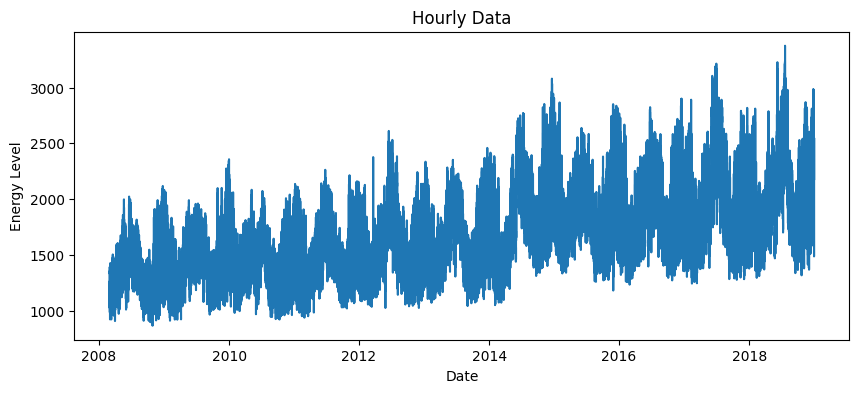

In [4]:
# plot current in train over dates
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df.datetime, df.energy)
ax.set_title('Hourly Data')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Level')
plt.show()

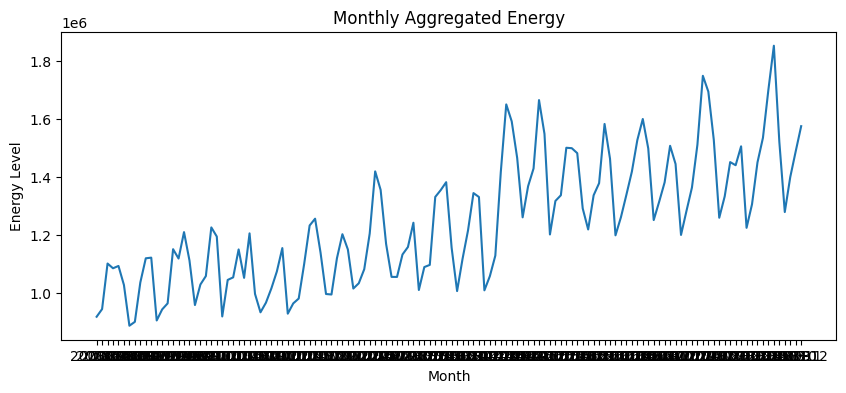

In [5]:
# monthly graph
df2 = df.copy()
df2['fiscalno'] = df2['datetime'].dt.strftime('%Y%m')
df2['year'] = df2['datetime'].dt.year

grp = df2.groupby('fiscalno')['energy'].sum().reset_index()

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(grp.fiscalno, grp.energy)
ax.set_title('Monthly Aggregated Energy')
ax.set_xlabel('Month')
ax.set_ylabel('Energy Level')
plt.show()

/Users/Ty/Code/Pets/forecast/env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


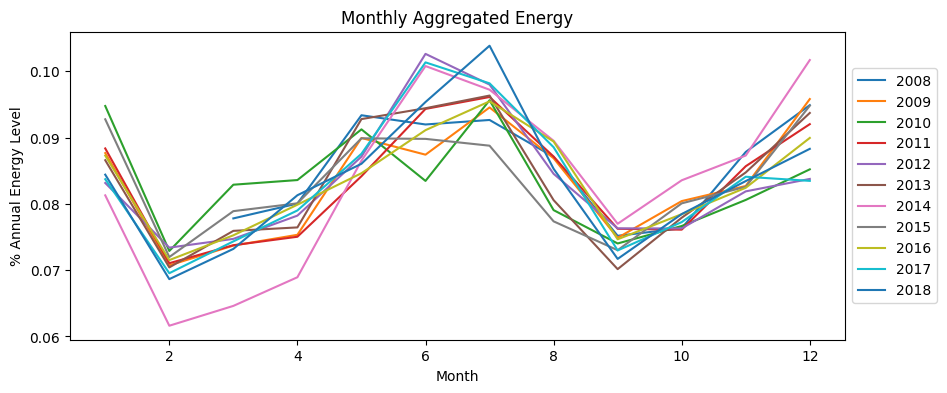

In [6]:
# in each year see which months use the most energy
month_df = df2.copy()
month_df['month'] = month_df['datetime'].dt.month
grpd = month_df.groupby('month')['energy'].sum().reset_index()

for y in list(df2['year'].unique()):
    tmp = df2[df2['year'] == y]
    tmp['month'] = df2['datetime'].dt.month
    grp = tmp.groupby('month')['energy'].sum().reset_index()
    prorate = 1

    if y == 2008:
        grp.loc[-1] = [2,np.nan]
        grp.index = grp.index + 1
        grp.loc[-1] = [1,np.nan]
        grp.index = grp.index + 1
        grp = grp.sort_index()
        prorate = 14/12 # prorate factor on percent values since 2008 is missing Jan-Feb

    tmp_tot = grp['energy'].sum() * prorate
    grpd[f'annual_pct_{y}'] = grp['energy'] / tmp_tot

grp_ann = grpd.drop(['energy'], axis=1).set_index('month')

leg_yrs = [c[-4:] for c in grp_ann.columns]

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(grp_ann)
ax.set_title('Monthly Aggregated Energy')
ax.set_xlabel('Month')
ax.set_ylabel('% Annual Energy Level')
#plt.legend(grp_ann.columns)
plt.legend(leg_yrs, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

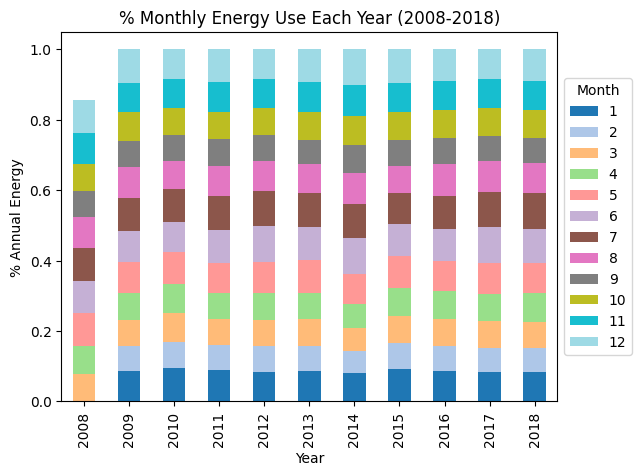

In [7]:
trans = grp_ann.transpose()
trans.index = [t[-4:] for t in trans.index]
trans.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('% Monthly Energy Use Each Year (2008-2018)')
plt.xlabel('Year')
plt.ylabel('% Annual Energy')
plt.legend(trans.columns, loc='center left', bbox_to_anchor=(1, 0.5), title='Month')
plt.show()